# Multi-Source Research Agent — LangGraph Visualization

This notebook builds the same graph as your agent (with stub nodes) and draws it so you can see the flow: parallel search → Reddit URL selection → post retrieval → parallel analysis → synthesis.

## 1. Build the graph (stub nodes, no external APIs)

Same `State`, same nodes and edges as in `main.py`; node functions are no-ops so we don't need `web_operations` or `prompts`.

In [1]:
from typing import Annotated, List
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict


class State(TypedDict):
    messages: Annotated[list, add_messages]
    user_question: str | None
    google_results: str | None
    bing_results: str | None
    reddit_results: str | None
    selected_reddit_urls: list[str] | None
    reddit_post_data: list | None
    google_analysis: str | None
    bing_analysis: str | None
    reddit_analysis: str | None
    final_answer: str | None


def stub(state: State):
    return {}


builder = StateGraph(State)

builder.add_node("google_search", stub)
builder.add_node("bing_search", stub)
builder.add_node("reddit_search", stub)
builder.add_node("analyze_reddit_posts", stub)
builder.add_node("retrieve_reddit_posts", stub)
builder.add_node("analyze_google_results", stub)
builder.add_node("analyze_bing_results", stub)
builder.add_node("analyze_reddit_results", stub)
builder.add_node("synthesize_analyses", stub)

builder.add_edge(START, "google_search")
builder.add_edge(START, "bing_search")
builder.add_edge(START, "reddit_search")

builder.add_edge("google_search", "analyze_reddit_posts")
builder.add_edge("bing_search", "analyze_reddit_posts")
builder.add_edge("reddit_search", "analyze_reddit_posts")
builder.add_edge("analyze_reddit_posts", "retrieve_reddit_posts")

builder.add_edge("retrieve_reddit_posts", "analyze_google_results")
builder.add_edge("retrieve_reddit_posts", "analyze_bing_results")
builder.add_edge("retrieve_reddit_posts", "analyze_reddit_results")

builder.add_edge("analyze_google_results", "synthesize_analyses")
builder.add_edge("analyze_bing_results", "synthesize_analyses")
builder.add_edge("analyze_reddit_results", "synthesize_analyses")

builder.add_edge("synthesize_analyses", END)

graph = builder.compile()
print("Graph compiled.")

Graph compiled.


## 2. Draw the graph (ASCII)

Text diagram in the notebook — no extra dependencies.

In [2]:
ascii_diagram = graph.get_graph().draw_ascii()
print(ascii_diagram)

                                          +-----------+                                             
                                          | __start__ |*                                            
                                      ****+-----------+ ****                                        
                                 *****          *           *****                                   
                             ****               *                ****                               
                          ***                   *                    ***                            
              +-------------+           +---------------+           +---------------+               
              | bing_search |           | google_search |           | reddit_search |               
              +-------------+****       +---------------+        ***+---------------+               
                                 *****          *           *****                          

## 3. Mermaid diagram (code)

You can copy the output below and paste it into [mermaid.live](https://mermaid.live) to get an interactive diagram.

In [3]:
mermaid_code = graph.get_graph().draw_mermaid()
print(mermaid_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	google_search(google_search)
	bing_search(bing_search)
	reddit_search(reddit_search)
	analyze_reddit_posts(analyze_reddit_posts)
	retrieve_reddit_posts(retrieve_reddit_posts)
	analyze_google_results(analyze_google_results)
	analyze_bing_results(analyze_bing_results)
	analyze_reddit_results(analyze_reddit_results)
	synthesize_analyses(synthesize_analyses)
	__end__([<p>__end__</p>]):::last
	__start__ --> bing_search;
	__start__ --> google_search;
	__start__ --> reddit_search;
	analyze_bing_results --> synthesize_analyses;
	analyze_google_results --> synthesize_analyses;
	analyze_reddit_posts --> retrieve_reddit_posts;
	analyze_reddit_results --> synthesize_analyses;
	bing_search --> analyze_reddit_posts;
	google_search --> analyze_reddit_posts;
	reddit_search --> analyze_reddit_posts;
	retrieve_reddit_posts --> analyze_bing_results;
	retrieve_reddit_posts --> analyze_google_results;
	retrieve

## 4. Draw as PNG in the notebook (optional)

Requires `grandalf`: run `uv add grandalf` if you get an error. Then re-run this cell.

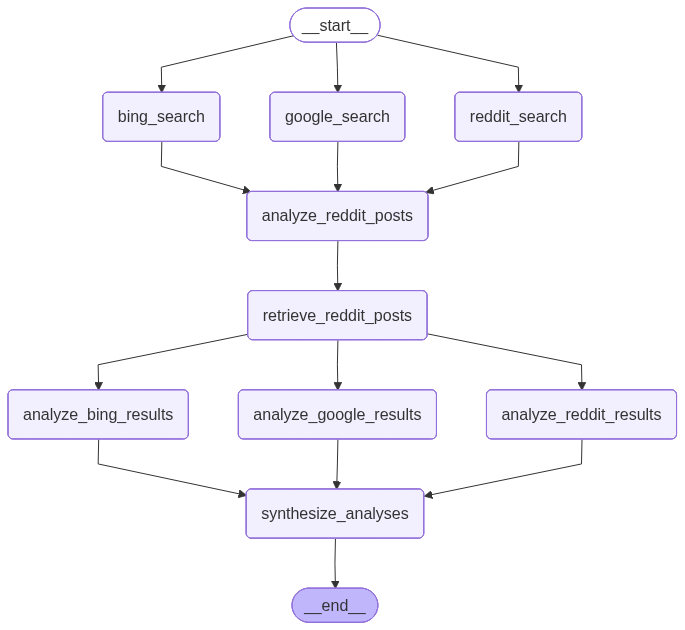

In [4]:
try:
    from IPython.display import Image
    png_bytes = graph.get_graph().draw_mermaid_png()
    display(Image(png_bytes))
except Exception as e:
    print(f"PNG drawing failed (install with: uv add grandalf): {e}")
    print("Use the Mermaid code from the cell above in https://mermaid.live instead.")

In [5]:
# Save PNG to file so you can open it in Preview / Finder
png_bytes = graph.get_graph().draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(png_bytes)
print("Saved graph to graph.png")

Saved graph to graph.png
